# Join Data

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore") 

df1 = pd.read_csv('scores/handle_time_score.csv', index_col=0)
df2 = pd.read_csv('scores/volume_score.csv', index_col=0)
df3 = pd.read_csv('scores/aht_score.csv', index_col=0)

df = pd.concat([df1,df2,df3],0)
df['bu'] = df.index
df.index = range(df.shape[0])

df['diff'] = df['old'] - df['prophet']

# only consider better MAE than old model
diff = df[df['diff']>0]

# Calculate cost savings

In [215]:
for kpi in ['handle_time', 'volume', 'aht']:
    
    hours_saved = diff.loc[df['kpi']==kpi]['diff'].sum()
    if kpi == 'handle_time':
        hours_saved /= 3600

    print('\nDaily '+kpi+' Saved:',round(hours_saved,1))
    print('Annual Savings:',"${:,.2f}".format(hours_saved * 262 * 25))


Daily handle_time Saved: 59.8
Annual Savings: $391,861.67

Daily volume Saved: 92.9
Annual Savings: $608,814.72

Daily aht Saved: 84.7
Annual Savings: $554,942.24


# Visualize cost savings

,old,prophet,kpi,start_train,end_train,bu,diff
bu,,,,,,,
BRO-Co,17326.333333,13187.170243,handle_time,2018-10-01,2020-10-01,BRO-Co,4139.163090
RIS_ah,155039.622951,132135.213482,handle_time,2017-01-20,2020-06-01,RIS_ah,22904.409469
BRO_ah,23283.428571,22159.426852,handle_time,2018-11-01,2020-11-01,BRO_ah,1124.001720
CS-Mar,22951.642857,15619.191911,handle_time,2018-11-01,2020-11-01,CS-Mar,7332.450946
PSG_ah,100356.166667,65889.087301,handle_time,2018-10-01,2020-10-01,PSG_ah,34467.079365
CS-Nat,11322.122807,7020.772130,handle_time,2017-01-01,2020-09-01,CS-Nat,4301.350677
CS-Ala,5689.785714,3825.260409,handle_time,2018-11-01,2020-11-01,CS-Ala,1864.525305
WISE-C,352606.070175,213364.695370,handle_time,2016-01-20,2020-09-01,WISE-C,139241.374805
BRO-Co,25.000000,21.704785,volume,2018-10-01,2020-10-01,BRO-Co,3.295215



Daily volume Saved: 92.9
Annual Savings: $608,814.72

Daily aht Saved: 84.7
Annual Savings: $554,942.24

Daily handle_time Saved: 59.8
Annual Savings: $391,861.67


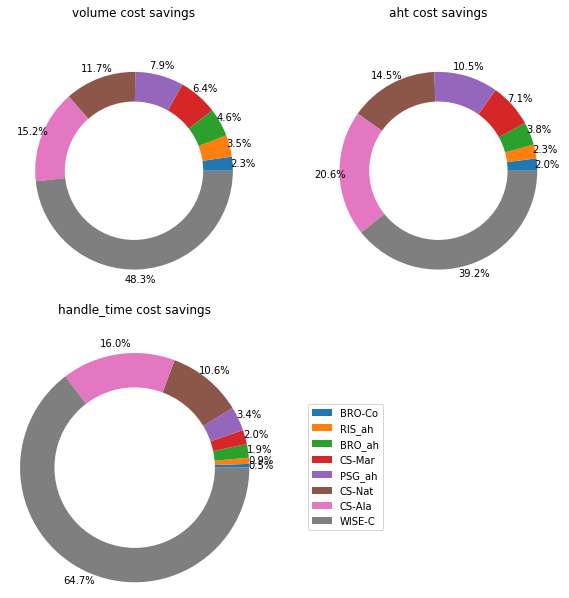

In [238]:
display(diff)
fig = plt.figure(figsize=(10,10))
for i, kpi in enumerate(['volume', 'aht','handle_time']):
    hours_saved = diff.loc[diff['kpi']==kpi]['diff'].sum()
    if kpi == 'handle_time':
        hours_saved /= 3600

    print('\nDaily '+kpi+' Saved:',round(hours_saved,1))
    print('Annual Savings:',"${:,.2f}".format(hours_saved * 262 * 25))
    plt.subplot(2,2,i+1)
    diff['diff'][diff['kpi']==kpi].sort_values().plot.pie(autopct='%0.1f%%', figsize=(4,4), 
                     y='diff', labels=None, pctdistance=1.1, subplots=True)
    plt.title(kpi+' cost savings', y=1.1)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.ylabel('')
    
plt.axis('equal')
plt.legend(labels=handle_time['bu'], loc='right', bbox_to_anchor=(1.5,0.5))
plt.show()